Neural Networks (NN), Convolutional Neural Networks (CNN), and Autoencoders (AE) are fundamental concepts in the field of artificial intelligence and machine learning. Neural Networks provide a general framework for learning complex patterns from data, Convolutional Neural Networks excel in image-related tasks by capturing spatial patterns, and Autoencoders offer a means to reduce data dimensionality and extract meaningful features.

Here we'll analyse how the MNIST dataset performs under dense AE, with a few different bottlenecks. In particular, we'll consider a bottleneck of 2, and plot it.

# Imports

In [1]:
import torch
from torch.utils.data import TensorDataset
import matplotlib.pyplot as plt
import pickle
import numpy as np

from AutoEncoder import AutoEncoder
from keras.datasets import mnist

plt.rcParams['image.cmap'] = 'plasma'

# Create Dataset

In [2]:
# Import dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(len(X_train),784)/255
X_test = X_test.reshape(len(X_test),784)/255

In [3]:
train_set = TensorDataset(torch.tensor(X_train).float())
test_set = TensorDataset(torch.tensor(X_test).float())

In [4]:
# Saving parameters
def save(model, losses, PATH_model, PATH_losses):
    # Save model params
    torch.save(model.state_dict(), PATH_model)
    # Save losses
    with open(PATH_losses, 'wb') as f:
        pickle.dump(losses, f)


# Load parameters
def load(model, PATH_model, PATH_losses):
    # Load model params
    model.load_state_dict(torch.load(PATH_model))
    # Return losses
    with open(PATH_losses, 'rb') as f:
        losses = pickle.load(f)
    return losses

In [5]:
# Showing the first N test examples and predictions
def show_test(model, test_data, N):
    _ , ax = plt.subplots(2, N, figsize = (2.4*N,4))
    for i in range(N):
        # Get digit and prediciton
        digit = test_data[i][0]
        pred = model(digit)

        # Make numpy
        digit = digit.detach().numpy().reshape((28,28))
        pred = pred.detach().numpy().reshape((28,28))

        # Plot
        ax[0, i].imshow(digit)
        ax[1, i].imshow(pred)
        
    plt.show()
        

# Dense Autoencoder

## Bottleneck = 50

To start of lightly, we consider a bottleneck of 50. We won't pay much attention to the hyperparameters of the learning, and just consider standard values. 

OPTIONAL: Train the model yourself. (Approx 2m30s)

HOW: Uncomment the following cell.

In [6]:
# # Create and train model
# autoencoder = AutoEncoder([784, 200, 50], [50, 200, 784])
# losses = autoencoder.train(train_set, batch_size = 20, epochs = 30, lr = 0.01, optimizer = 'adam', verbose = 2000)

# # Save model
# save(autoencoder, losses, 'params/autoencoder_784_200_50.pth', 'params/losses_784_200_50.pth')


Loading the saved parameters of the AutoEncoder.

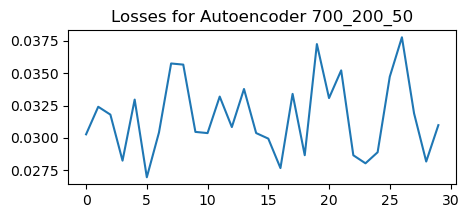

In [7]:
autoencoder = AutoEncoder([784, 200, 50], [50, 200, 784])
losses = load(autoencoder, 'params/autoencoder_784_200_50.pth', 'params/losses_784_200_50.pth')

# Plot losses
plt.figure(figsize=(5, 2))
plt.plot(losses)
plt.title('Losses for Autoencoder 700_200_50')
plt.show()

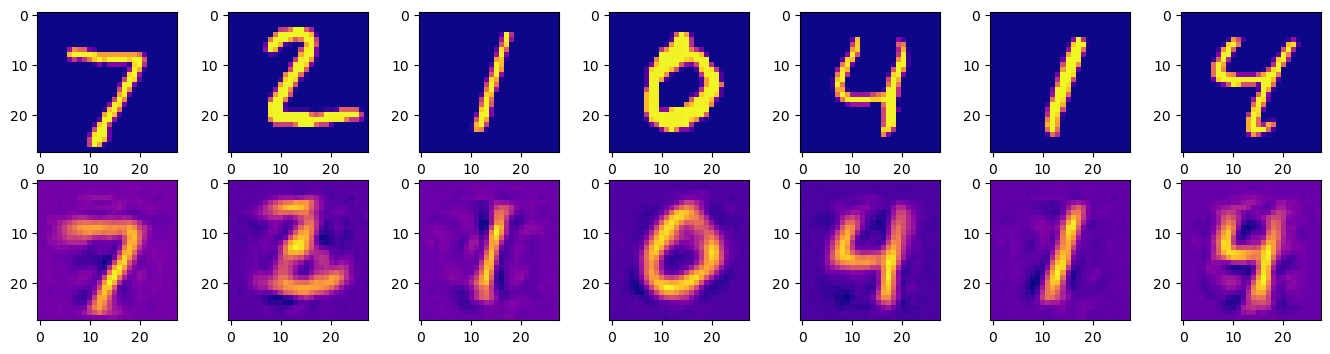

In [8]:
show_test(autoencoder, test_set, 7)

It looks like it performs pretty good for a bottleneck of 50. It appears to be re

## Bottleneck = 10

We'll now attempt a more risky architecture, with a bottleneck of 10.

OPTIONAL: Train the model yourself. (Approx 2m30s)

HOW: Uncomment the following cell.

In [9]:
# # Create and train model
# autoencoder2 = AutoEncoder([784, 100, 10], [10, 100, 784])
# losses2 = autoencoder.train(train_set, batch_size = 20, epochs = 30, lr = 0.01, optimizer = 'adam', verbose = 2000)

# # Save model
# save(autoencoder2, losses2, 'params/autoencoder_784_100_10.pth', 'params/losses_784_100_10.pth')


Loading the saved parameters of the AutoEncoder.

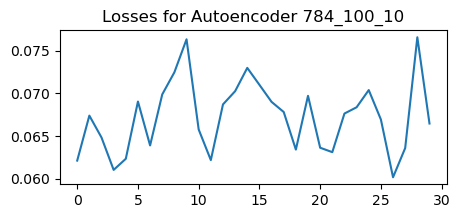

In [10]:
autoencoder2 = AutoEncoder([784, 100, 10], [10, 100, 784])
losses2 = load(autoencoder2, 'params/autoencoder_784_100_10.pth', 'params/losses_784_100_10.pth')

# Plot losses
plt.figure(figsize=(5, 2))
plt.plot(losses2)
plt.title('Losses for Autoencoder 784_100_10')
plt.show()

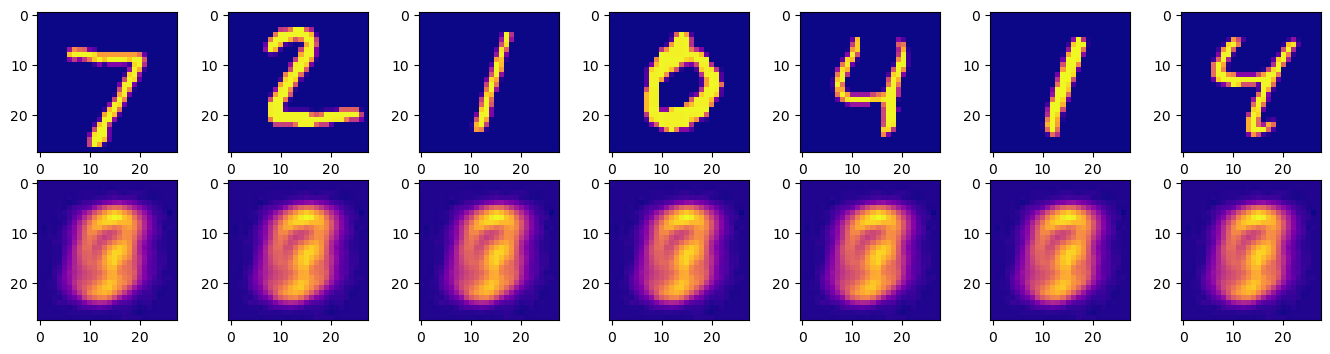

In [11]:
show_test(autoencoder2, test_set, 7)

In this case it appears all of the digits are just merged into a mix which allows it to minimize the overall loss. However it is not effectively learning anything.

## Bottleneck = 2

Here, the goal is not to make good predictions. Instead it is to train the dataset on the train set, and then plot in a 2D graph where each point lies ordered by color.

OPTIONAL: Train the model yourself. (Approx 2m)

HOW: Uncomment the following cell.

In [12]:
# # Create and train model
# autoencoder3 = AutoEncoder([784, 300, 2], [2, 300, 784])
# losses3 = autoencoder.train(train_set, batch_size = 20, epochs = 30, lr = 0.01, optimizer = 'adam', verbose = 2000)

# # Save model
# save(autoencoder3, losses3, 'params/autoencoder_784_300_2.pth', 'params/losses_784_300_2.pth')

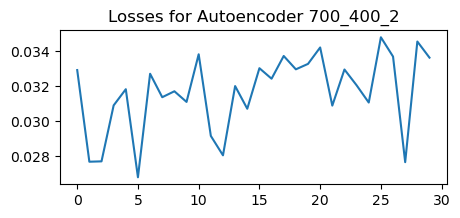

In [13]:
autoencoder3 = AutoEncoder([784, 300, 2], [2, 300, 784])
losses3 = load(autoencoder3, 'params/autoencoder_784_300_2.pth', 'params/losses_784_300_2.pth')

# Plot losses
plt.figure(figsize=(5, 2))
plt.plot(losses3)
plt.title('Losses for Autoencoder 700_400_2')
plt.show()

As we can see, with dense autoencoders, we cannot achieve much.

/var/folders/1z/j_4fdy254cs9grzc9c3yt13c0000gn/T/ipykernel_33907/2618255872.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(points[:, 0], points[:, 1], c=y_test, s = 1, cmap= plt.cm.get_cmap('tab10'))


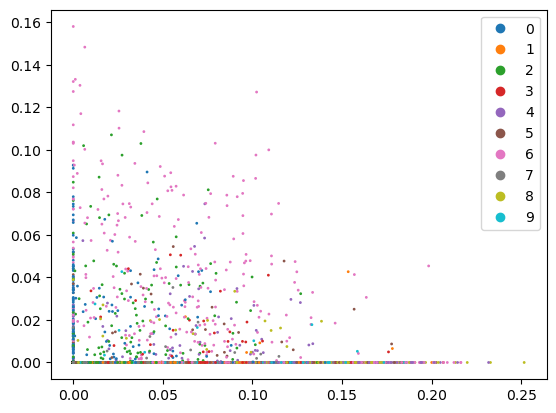

In [14]:
# Get the points in the latent space
X_test_torch = torch.Tensor(X_test).float()
points = autoencoder3.encoder(X_test_torch).detach().numpy()

# Plot them
scatter = plt.scatter(points[:, 0], points[:, 1], c=y_test, s = 1, cmap= plt.cm.get_cmap('tab10'))

# Add legend
plt.legend(handles=scatter.legend_elements()[0], labels=range(10))
plt.show()

After *multiple* attempts with swapping the layers, depth and width, learning rate and epochs it wasn't found a good solution. Almost all of them depracated to a line or a point.

# Convolutional AutoEncoder

## AutoEncoder 1

In [15]:
X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)

train_set = TensorDataset(torch.Tensor(X_train).float())
test_set = TensorDataset(torch.Tensor(X_test).float())

As we stated earlier, convolution NN are much more useful for image and visual problems. They capture the relations between a point and its surroundings much more efficiently.

In [16]:
from AutoEncoderConv import AutoEncoderConv

autoencoder_conv = AutoEncoderConv()
print(autoencoder_conv)

AutoEncoderConv(
  (encoder): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(4, 4, kernel_size=(2, 2), stride=(2, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): ConvTranspose2d(4, 1, kernel_size=(2, 2), stride=(2, 2))
    (3): Sigmoid()
  )
)


In [17]:
# Showing the first N test examples and predictions
def show_test(model, test_data, N):
    _, ax = plt.subplots(2, N, figsize = (2.4*N,4))
    for i in range(N):
        # Get digit and prediciton
        digit = test_data[i][0]
        pred = model(digit)

        # Make numpy
        digit = digit.detach().numpy().reshape((28,28))
        pred = pred.detach().numpy().reshape((28,28))

        # Plot
        ax[0, i].imshow(digit)
        ax[1, i].imshow(pred)
        
    plt.show()
        

OPTIONAL: Train the model yourself. (Approx 8m30s)

HOW: Uncomment the following cell.

In [18]:
# # Training
# losses_conv = autoencoder_conv.train(train_set, batch_size = 20, epochs = 15, lr = 0.005, optimizer = 'adam', verbose = 2000)

# # Save model
# save(autoencoder_conv, losses_conv, 'params_conv/autoencoder1.pth', 'params_conv/losses1.pth')

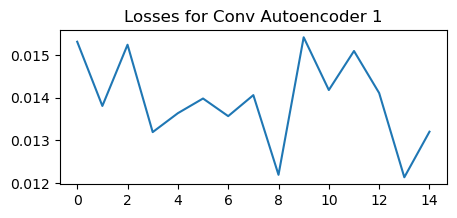

In [19]:
autoencoder_conv = AutoEncoderConv()
losses1 = load(autoencoder_conv, 'params_conv/autoencoder1.pth', 'params_conv/losses1.pth')

# Plot losses
plt.figure(figsize=(5, 2))
plt.plot(losses1)
plt.title('Losses for Conv Autoencoder 1')
plt.show()

The bottleneck was of size 4x7x7 = 196. Which is not that little, so we're expecting it to have relatively good. And in fact, this is what we observe. Aside from some lack of information on the digits, it appears that essentially every detail of the numbers are recovered with a very high definition.

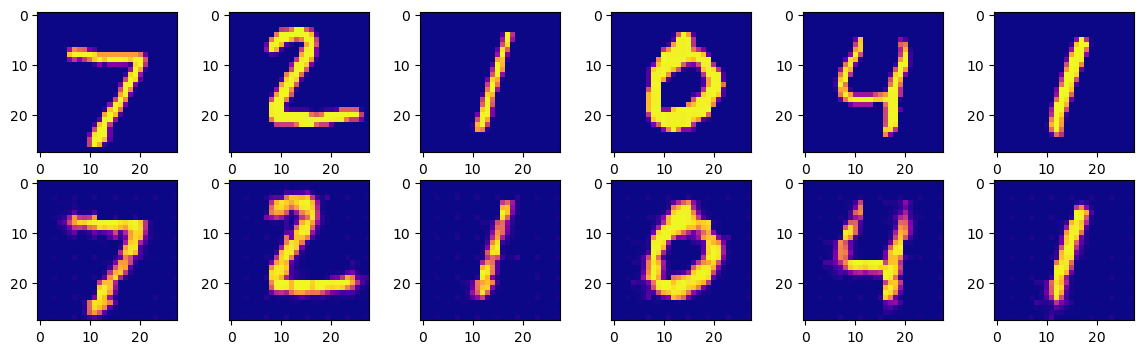

In [20]:
show_test(autoencoder_conv, test_set, 6)

## AutoEncoder 2

Now we will try an even smaller, as to compare to the bottleneck of 50 on the dense autoencoder.

In [21]:
from AutoEncoderConv2 import AutoEncoderConv2

autoencoder_conv2 = AutoEncoderConv2()
print(autoencoder_conv2)

AutoEncoderConv2(
  (encoder): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=196, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=196, bias=True)
  (decoder): Sequential(
    (0): ConvTranspose2d(4, 4, kernel_size=(2, 2), stride=(2, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): ConvTranspose2d(4, 1, kernel_size=(2, 2), stride=(2, 2))
    (3): Sigmoid()
  )
)


Because of the implementation of the autoencoder, we will need a need a slightly different function

In [22]:
# Showing the first N test examples and predictions
def show_test(model, test_data, N):
    _ , ax = plt.subplots(2, N, figsize = (2.4*N,4))
    for i in range(N):
        # Get digit and prediciton
        digit = test_data[i][0].reshape(1, 1, 28, 28)
        pred = model(digit)

        # Make numpy
        digit = digit.detach().numpy().reshape((28,28))
        pred = pred.detach().numpy().reshape((28,28))

        # Plot
        ax[0, i].imshow(digit)
        ax[1, i].imshow(pred)
        
    plt.show()
        

OPTIONAL: Train the model yourself. (Approx 5m)

HOW: Uncomment the following cell.

In [23]:
# # Training
# losses_conv2 = autoencoder_conv2.train(train_set, batch_size = 20, epochs = 15, lr = 0.005, optimizer = 'adam', verbose = 2000)

# # Save model
# save(autoencoder_conv2, losses_conv2, 'params_conv/autoencoder2.pth', 'params_conv/losses2.pth')

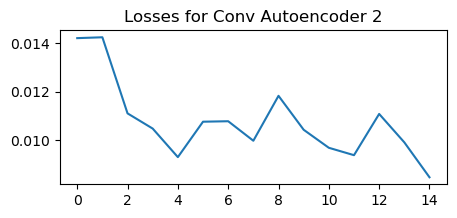

In [24]:
autoencoder_conv2 = AutoEncoderConv2()
losses2 = load(autoencoder_conv2, 'params_conv/autoencoder2.pth', 'params_conv/losses2.pth')

# Plot losses
plt.figure(figsize=(5, 2))
plt.plot(losses2)
plt.title('Losses for Conv Autoencoder 2')
plt.show()

Somehow, this one appears to be even bettern than the previous one without the fully connected layer in the middle. It seems to have less loss of information. Moreover, it is many times better than the original fully connected autoencoder witha bottleneck of 50.

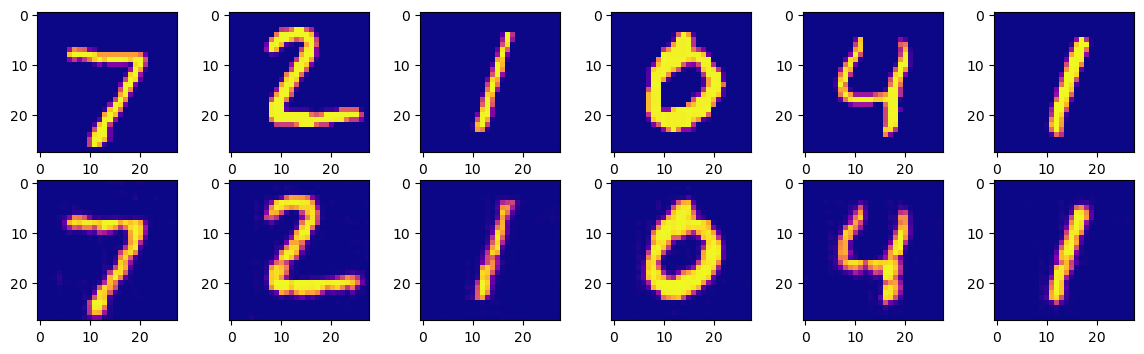

In [25]:
show_test(autoencoder_conv2, test_set, 6)

## Autoencoder 3 - 2D graph

Finally we attempt to generate a 2D scatter graph using a latent space of dimensions 2.

In [26]:
import torch
from torch.utils.data import TensorDataset
import matplotlib.pyplot as plt
import pickle

from keras.datasets import mnist

# Import dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 1, 28, 28)/255
X_test = X_test.reshape(-1, 1, 28, 28)/255

# X_train = X_train.reshape(-1, 1, 28, 28)
# X_test = X_test.reshape(-1, 1, 28, 28)

train_set = TensorDataset(torch.tensor(X_train).float())
test_set = TensorDataset(torch.tensor(X_test).float())

In [27]:
from AutoEncoderConv3 import AutoEncoderConv3

autoencoder_conv3 = AutoEncoderConv3()
print(autoencoder_conv3)

AutoEncoderConv3(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=196, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=196, bias=True)
  (decoder): Sequential(
    (0): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
    (3): Sigmoid()
  )
)


OPTIONAL: Train the model yourself. (Approx 7m30s)

HOW: Uncomment the following cell.

In [28]:
# # Training
# losses_conv3 = autoencoder_conv3.train(train_set, batch_size = 20, epochs = 15, lr = 0.01, optimizer = 'adam', verbose = 2000)

# # Save model
# save(autoencoder_conv3, losses_conv3, 'params_conv/autoencoder3.pth', 'params_conv/losses3.pth')

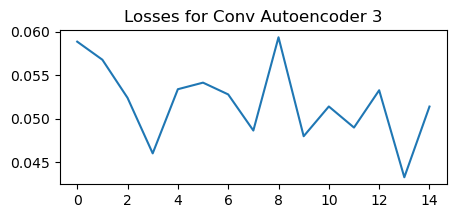

In [29]:
autoencoder_conv3 = AutoEncoderConv3()
losses3 = load(autoencoder_conv3, 'params_conv/autoencoder3.pth', 'params_conv/losses3.pth')

# Plot losses
plt.figure(figsize=(5, 2))
plt.plot(losses3)
plt.title('Losses for Conv Autoencoder 3')
plt.show()

Even though we weren't originally to plot the outputs, but only the lattent space, these seem to be surprisingly good for a bottleneck of 2!

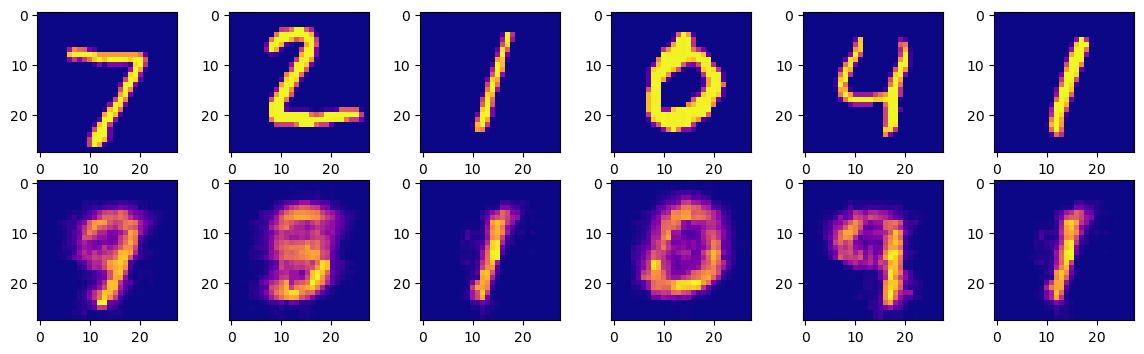

In [30]:
show_test(autoencoder_conv3, test_set, 6)

Here, we can see that with convolutional NN, we get a major improvement on the clustering of digits on the 2D latent space, relative to the fully connected case. We can see that some numbers group together.

/var/folders/1z/j_4fdy254cs9grzc9c3yt13c0000gn/T/ipykernel_33907/3943563815.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(points[:, 0], points[:, 1], c=y_test, s = 1, cmap = plt.cm.get_cmap('tab10'))


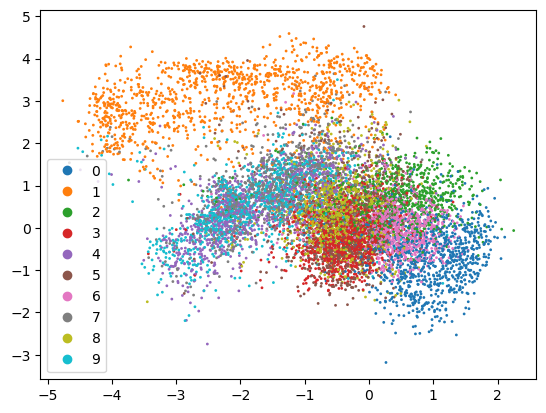

In [31]:
# Get latent points
X_test_torch = torch.Tensor(X_test).float()
points = autoencoder_conv3.forward_encoder(X_test_torch).detach().numpy()

# Plot points
scatter = plt.scatter(points[:, 0], points[:, 1], c=y_test, s = 1, cmap = plt.cm.get_cmap('tab10'))

# Add legend
plt.legend(handles=scatter.legend_elements()[0], labels=range(10))

plt.show()